In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from config import params

In [11]:
#set read_path
read_path = 'C:/Users/user/Desktop/NTU/碩一上/DS_Computing/Optimization/Final/expr_results'#

#define method names
method_name = ['hill_climbing', 'random_walk', 'simu_anneal', 'tabu_search', 'PSO', 
               'GA', 'ant_colony', 'hybrid(PSO-TS)'] 

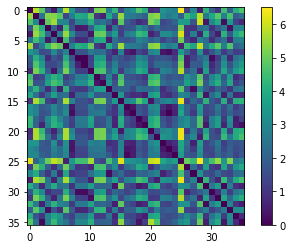

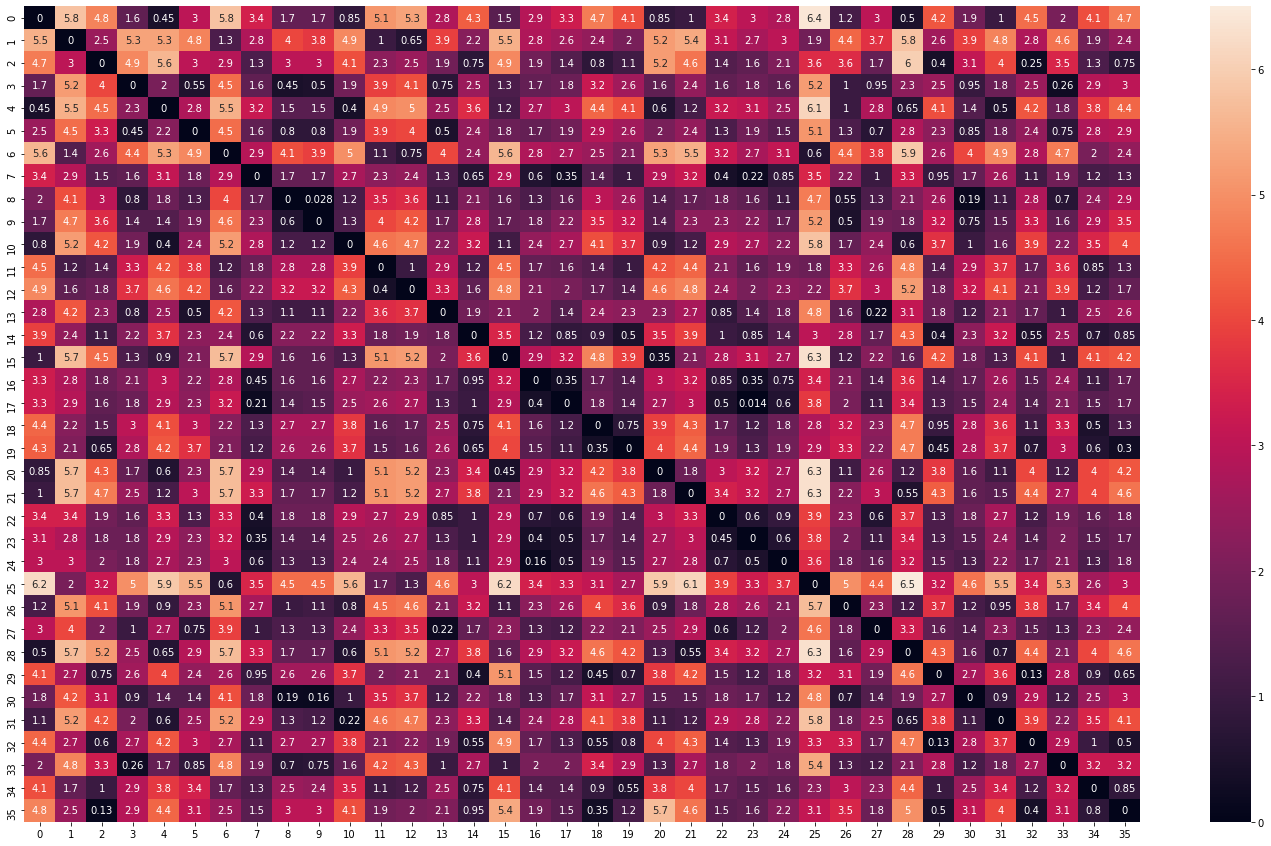

In [12]:
#plot distance matrix
def plot_dist():
    distance_matrix = np.load(os.path.join(read_path,'dist_matrix.npy'))

    #matplotlib
    plt.imshow(distance_matrix)
    plt.colorbar()
    plt.show()

    #heatmap    
    plt.figure(figsize=(25,15))
    sns.heatmap(distance_matrix, annot=True)
    
plot_dist()

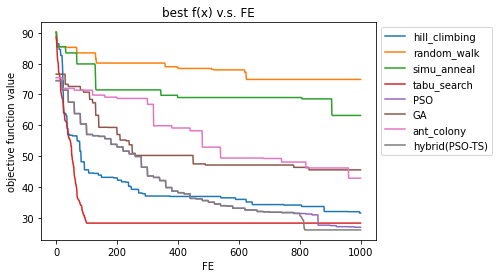

In [14]:
def plot_result(method_list, iteration, PSO_iter, GA_iter, ant_iter, first_stg, second_stg):
    #read the stored results
    hc = np.load(os.path.join(read_path, 'hc_results.npy'))
    rw = np.load(os.path.join(read_path,'rw_results.npy'))
    sa = np.load(os.path.join(read_path,'sa_results.npy'))
    tb = np.load(os.path.join(read_path,'tb_results.npy'))
    pso = np.load(os.path.join(read_path,'PSO_results.npy'))
    ga = np.load(os.path.join(read_path,'GA_results.npy'), allow_pickle = True)
    ant = np.load(os.path.join(read_path,'ant_results.npy'), allow_pickle = True)
    hyb = np.load(os.path.join(read_path,'hyb_results.npy'))
    
    #population methods modification for plots    
    #PSO    
    PSO_resize = iteration / PSO_iter
    PSO_list = []
    for i in range(len(pso)):
        for _ in range(int(PSO_resize)): #range(20)
            PSO_list.append(pso[i])
    
    #GA
    GA_resize = iteration / GA_iter
    GA_list = []
    for i in range(len(ga)):
        for _ in range(int(GA_resize)): #range(10)
            GA_list.append(ga[i][1])

    # AntColony
    ant_resize = iteration / ant_iter
    ant_list = []
    for i in range(len(ant)):
        for _ in range(int(ant_resize)): #range(20)
            ant_list.append(ant[i][1])

    # hybrid(PSO-TS)
    hybrid_resize = (iteration - second_stg) / first_stg #800/40 = 20
    hybrid_list = []
    for i in range(first_stg): #0~39
        for _ in range(int(hybrid_resize)): #range(25)
            hybrid_list.append(hyb[i])

    for j in range(first_stg, len(hyb)): #40~239
        hybrid_list.append(hyb[j])
 
    #FE plot
    plt.plot(np.arange(0,iteration), hc, label = method_list[0])
    plt.plot(np.arange(0,iteration), rw, label = method_list[1])
    plt.plot(np.arange(0,iteration), sa, label = method_list[2])
    plt.plot(np.arange(0,iteration), tb, label = method_list[3])
    plt.plot(np.arange(0,iteration), PSO_list, label = method_list[4])
    plt.plot(np.arange(0,iteration), GA_list, label = method_list[5])
    plt.plot(np.arange(0,iteration), ant_list, label = method_list[6])
    plt.plot(np.arange(0,iteration), hybrid_list, label = method_list[7])
    plt.xlabel('FE')
    plt.ylabel('objective function value')
    plt.title('best f(x) v.s. FE')
    plt.legend(bbox_to_anchor=(1.0,1.0))
    plt.show()
    
plot_result(method_name, **params)